# MNIST - Neural Networks

### Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.set_printoptions(precision=2)

### Importing the data

In [34]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [35]:
data_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X = data_train.iloc[:, 1:].values
X_test = data_test.iloc[:, :].values
Y = data_train.iloc[:, 0].values

In [38]:
X.shape,X_test.shape,Y.shape

((42000, 784), (28000, 784), (42000,))

In [39]:
X = X.T
X_test = X_test.T
Y = Y.reshape(len(Y),1)
X.shape,X_test.shape,Y.shape

((784, 42000), (784, 28000), (42000, 1))

In [40]:
Y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

coltrans = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse=False), [0])])
Y = np.array(coltrans.fit_transform(Y))
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
Y = Y.T
print("Shape of X is", X.shape)
print("Shape of Y is", Y.shape)
print("Shape of X_test is", X_test.shape)
print("Total number of training example", X.shape[1])

Shape of X is (784, 42000)
Shape of Y is (10, 42000)
Shape of X_test is (784, 28000)
Total number of training example 42000


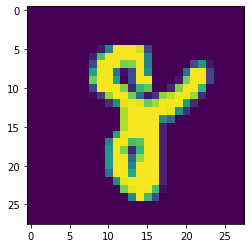

Number is 8


In [43]:
index = random.randint(0, X.shape[1])
plt.imshow(X[:, index].reshape(28,28))
plt.show()
print("Number is",list(Y[:,index]).index(1.))

### Initialize Parameters

##### Layer Sizes

In [44]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 1000
    return n_x,n_y,n_h

In [45]:
n_x,n_y,n_h = layer_sizes(X,Y)
print("The size of Input Layer n_x is", n_x)
print("The size of Hidden Layer n_h is", n_h)
print("The size of Output Layer n_y is", n_y)

The size of Input Layer n_x is 784
The size of Hidden Layer n_h is 1000
The size of Output Layer n_y is 10


#### Parameters

In [46]:
def intialize_parameters(n_x, n_y, n_h):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    return parameters

In [47]:
np.random.seed(2)
parameters = intialize_parameters(n_x, n_y, n_h)
print("W1 = "+str(parameters["W1"]))
print("b1 = "+str(parameters["b1"]))
print("W2 = "+str(parameters["W2"]))
print("b2 = "+str(parameters["b2"]))

W1 = [[-0.   -0.   -0.02 ... -0.01  0.   -0.01]
 [-0.01 -0.01  0.02 ... -0.   -0.01  0.  ]
 [ 0.01 -0.02  0.   ... -0.01  0.01  0.  ]
 ...
 [-0.01  0.01 -0.01 ...  0.02  0.01  0.  ]
 [-0.    0.01  0.01 ... -0.01  0.01  0.02]
 [-0.01  0.    0.01 ... -0.01 -0.   -0.01]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


### Forward Propagation

In [48]:
def softmax(Z):
    expZ = np.exp(Z)
    return expZ/np.sum(expZ)

In [49]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}

    return A2,cache
    

In [50]:
A2,cache = forward_propagation(X, parameters)

print("A2 = "+str(A2))
print("A2 shape = "+str(A2.shape))

A2 = [[1.91e-06 2.30e-06 2.53e-06 ... 3.37e-06 3.18e-06 2.43e-06]
 [1.96e-06 2.27e-06 2.80e-06 ... 1.43e-06 3.35e-06 2.01e-06]
 [3.35e-06 1.67e-06 1.57e-06 ... 1.17e-06 1.28e-06 2.30e-06]
 ...
 [2.06e-06 2.71e-06 2.77e-06 ... 2.12e-06 1.50e-06 1.33e-06]
 [2.01e-06 3.38e-06 1.55e-06 ... 2.96e-06 1.99e-06 2.12e-06]
 [2.02e-06 2.14e-06 2.59e-06 ... 3.55e-06 1.76e-06 2.14e-06]]
A2 shape = (10, 42000)


### Cost Function

In [51]:
A2.shape, Y.shape

((10, 42000), (10, 42000))

In [52]:
def cost_function(A, Y):
    m = Y.shape[1]

    cost = -(1/m) * np.sum(Y * np.log(A))
    return cost

In [53]:
J = cost_function(A2, Y)
print(J)

13.002086880012968


### Back Propagation

In [59]:
A1 = cache["A1"]
print("A1 =",A1.shape)
A2 = cache["A2"]
print("A2 =",A2.shape)
Z2 = cache["Z2"]
print("Z2 =",Z2.shape)
W1 = parameters["W1"]
print("W1 =",W1.shape)
W2 = parameters["W2"]
print("W2 =",W2.shape)

A1 = (1000, 42000)
A2 = (10, 42000)
Z2 = (10, 42000)
W1 = (1000, 784)
W2 = (10, 1000)


In [55]:
def back_propagation(X, Y, parameters, cache):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    m = Y.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}

    return gradients

In [56]:
gradients = back_propagation(X, Y, parameters, cache)
print("dW1 =", gradients["dW1"])
print("db1 =", gradients["db1"])
print("dW2 =", gradients["dW2"])
print("db2 =", gradients["db2"])

dW1 = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
db1 = [[-2.10e-05]
 [-7.42e-05]
 [ 1.55e-05]
 [ 1.63e-04]
 [-7.12e-06]
 [ 1.35e-04]
 [-2.09e-04]
 [-4.83e-05]
 [-1.15e-04]
 [-3.61e-04]
 [ 2.17e-05]
 [-1.02e-04]
 [ 1.29e-04]
 [ 1.41e-04]
 [ 6.80e-05]
 [-4.24e-05]
 [-6.92e-05]
 [-3.61e-07]
 [-3.72e-05]
 [ 2.57e-04]
 [ 7.99e-05]
 [-6.38e-06]
 [-1.22e-04]
 [ 8.23e-05]
 [ 2.76e-05]
 [ 1.51e-04]
 [ 3.01e-04]
 [ 5.02e-05]
 [ 5.05e-06]
 [-7.80e-05]
 [-5.03e-05]
 [ 2.90e-05]
 [-1.15e-04]
 [ 9.40e-05]
 [ 4.28e-05]
 [ 1.45e-04]
 [ 2.72e-05]
 [-1.23e-04]
 [ 1.53e-04]
 [ 7.82e-05]
 [-8.44e-05]
 [ 1.86e-04]
 [-2.54e-04]
 [ 1.82e-04]
 [ 3.92e-05]
 [ 6.12e-06]
 [ 1.85e-06]
 [-3.54e-05]
 [ 5.88e-05]
 [-1.23e-05]
 [ 3.81e-05]
 [ 3.28e-05]
 [-3.27e-05]
 [ 1.66e-04]
 [ 7.63e-05]
 [ 2.65e-04]
 [ 2.55e-05]
 [-6.56e-05]
 [-9.78e-05]
 [ 4.72e-05]
 [ 2.28e-06]
 [-1.66e-05]
 [-1.26e-04]
 [-2.84e-05]


In [57]:
gradients["dW1"].shape, gradients["dW2"].shape

((1000, 784), (10, 1000))

In [58]:
gradients["db1"].shape, gradients["db2"].shape

((1000, 1), (10, 1))

### Update Parameters

In [ ]:
def update_parameters(parameters, gradients, alpha):

    